In [2]:
%matplotlib inline

import pandas as pd

OUTPUT = "./datasets/"

# Distributions Exercises

Identify:

* Random variable types
* FDP, FDA, FMP

## Dataset 1: Joint child malnutrition estimates – 2017 edition

Datasource: https://data.unicef.org/topic/nutrition/malnutrition/

* Severe Wasting: Percentage of children aged 0–59 months who are below minus three standard deviations from median weight-for-height of the WHO Child Growth Standards.
* Wasting – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median weight-for-height of the WHO Child Growth Standards.
* Overweight – Moderate and severe: Percentage of children aged 0-59 months who are above two standard deviations from median weight-for-height of the WHO Child Growth Standards. 
* Stunting – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median height-for-age of the WHO Child Growth Standards.
* Underweight – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median weight-for-age of the World Health Organization (WHO) Child Growth Standards

In [3]:
d1 = pd.read_csv(OUTPUT+'dataset1_joint_child_malnutrition_estimates.csv')

d1c = d1[['Region', 'Country and areas', 'Year', 'Severe wasting',  \
    'Wasting',  'Overweight',  'Stunting',  'Underweight']].copy()

d1c.sort_values(by=['Region', 'Country and areas', 'Year'], inplace=True)

In [4]:
d1c[(d1c.Year == 2000)].groupby(['Region'])["Severe wasting"].count()

Region
AFRICA      24
ASIA        13
EUROPE       4
LATINAME     8
Name: Severe wasting, dtype: int64

In [5]:
d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)][['Severe wasting', 'Region', 'Country and areas']]\
    .sort_values(by='Severe wasting', ascending=False).head()

,Severe wasting,Region,Country and areas
403,7.6,ASIA,LAO PEOPLE'S DEMOCRATIC REP. (THE)
110,7.5,ASIA,CAMBODIA
166,7.2,AFRICA,COMOROS (THE)
456,7.1,AFRICA,MAURITANIA
520,6.2,AFRICA,NIGER (THE)


Answer after analyze the figures below
1. Looking to Density Chart, which curve represents the worst region in terms of Severe Wasting? How to calculate this?
1. What is the probability of a country in Africa and Asia be under 1% of Severe Wasting?
    * Given an event (Severe Wasting) that occurs in a sample space (Africa and Asia countries) what is the probabilty of an element of this sample (an especific country) be under 1% of Severe Wasting? `P(SevereWasting(Country)) < 0.01`
1. Is the Histogram a good visualization to understand this behavior?
1. What is the difference between `stats.uniform.pdf` and `stats.uniform.cdf`

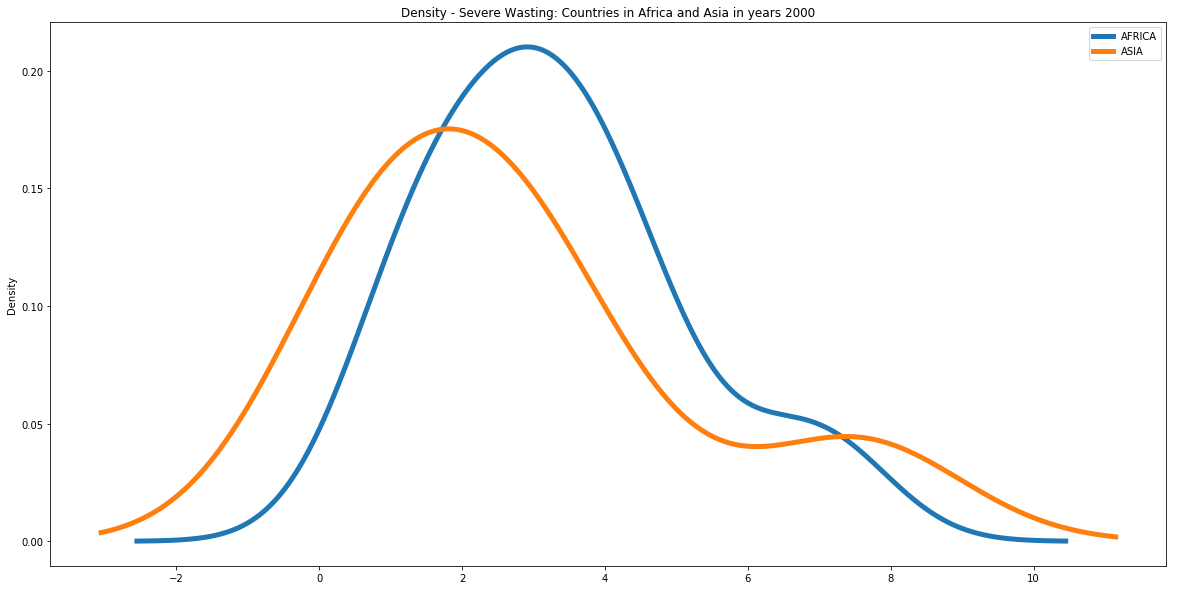

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

# when plotting the PDF, you need to specify normed=True in your call to .hist()
bp = d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)]\
                    .groupby('Region')['Severe wasting']\
                    .plot.density(legend=True, linewidth=5, 
                                  title='Density - Severe Wasting: Countries in Africa and Asia in years 2000')

### Some estimatives

Some estimatives about the probability of a country be under 1% in terms of Severe wasting.

In [61]:
((d1c[(d1c.Region.isin(['AFRICA']))&(d1c.Year == 2000)]['Severe wasting'] <= 1).value_counts()).loc[True]/\
((d1c[(d1c.Region.isin(['AFRICA']))&(d1c.Year == 2000)]['Severe wasting'] <= 1).value_counts()).loc[False]*100

12.0

In [67]:
((d1c[(d1c.Region.isin(['ASIA']))&(d1c.Year == 2000)]['Severe wasting'] <= 1).value_counts()).loc[True]/\
((d1c[(d1c.Region.isin(['ASIA']))&(d1c.Year == 2000)]['Severe wasting'] <= 1).value_counts()).loc[False]*100

41.666666666666671

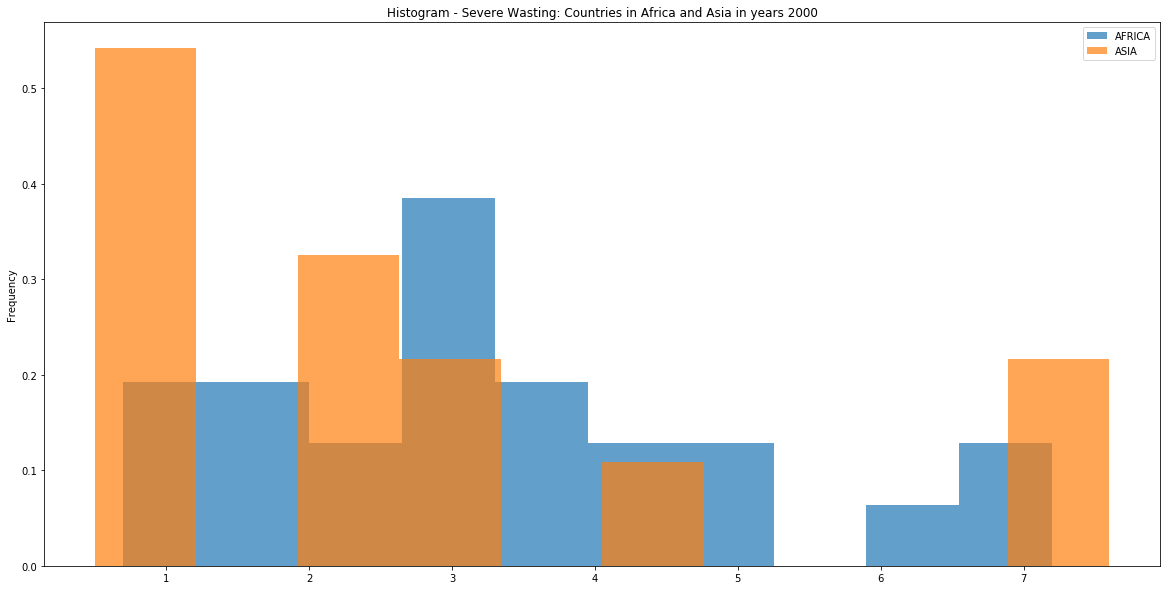

In [7]:
import matplotlib.pyplot as plt2

fig2, ax2 = plt2.subplots(figsize=(20,10))

bp = d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)]\
                    .groupby('Region')['Severe wasting']\
                    .plot.hist(legend=True, normed=True, alpha=0.7,
                               title='Histogram - Severe Wasting: Countries in Africa and Asia in years 2000')

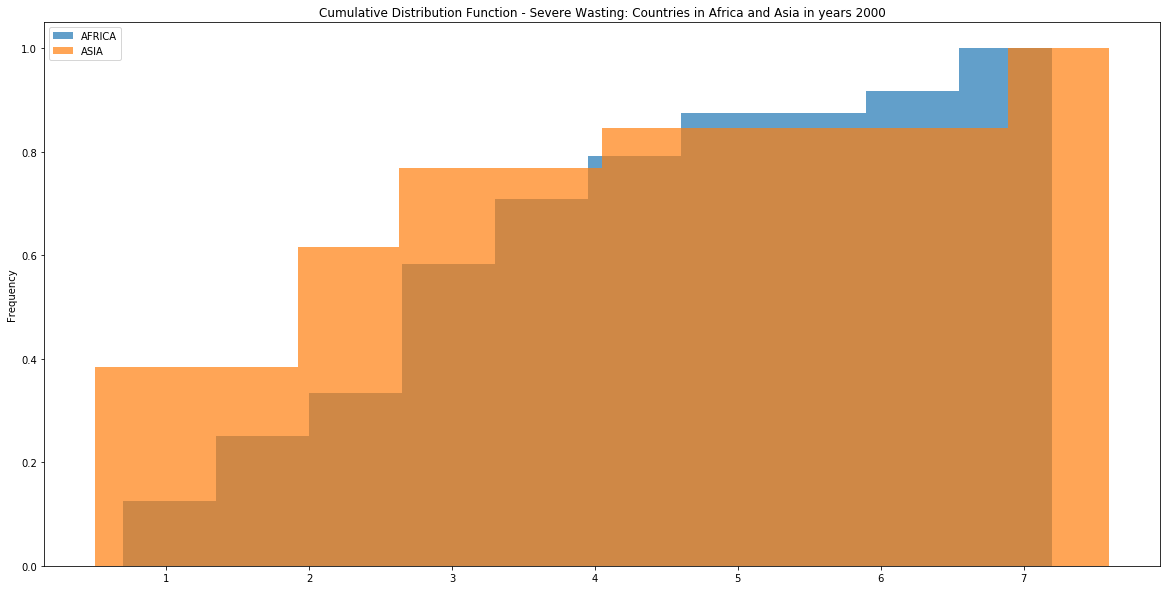

In [6]:
import matplotlib.pyplot as plt3

fig3, ax3 = plt.subplots(figsize=(20,10))

bp3 = d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)]\
                    .groupby('Region')['Severe wasting']\
                    .plot.hist(cumulative=True, legend=True, normed=True, alpha=0.7,
                                  title='Cumulative Distribution Function - Severe Wasting: Countries in Africa and Asia in years 2000')